In [2]:
#verifying the tensorflow installation
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(tf.keras.__version__)

2.4.0
2.4.0


In [3]:
#loading MNIST data
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
#displaying the shape of data
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
#Data preprocessing
#X_train is 60000 rows of 28X28 values; let's flatten by reshaping to 60000X784
reshaped = 784
X_train = X_train.reshape(60000,reshaped)
X_test = X_test.reshape(10000,reshaped)

#converting the data type to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalizing the input values to be within 0 to 1
X_train /= 255
X_test /= 255
print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

#one-hot representation of the target labels
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

(60000, 784) train samples
(10000, 784) test samples


In [28]:
#Designing the model
from tensorflow.keras.layers import Dense, Dropout #importing Dense and Dropout layers.
from tensorflow.keras import Sequential #importing sequential model from keras

model = tf.keras.Sequential() #defining model
N_hidden = 256 #defining hidden neurons to use in the layers

#adding densely connected layer to output 256 units
model.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation='relu'))

#adding dropout layer to reduce overfitting
model.add(Dropout(0.4))

#adding hidden layer to output 256 units
model.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))

#adding dropout layer to reduce overfitting
model.add(Dropout(0.4))

#adding hidden layer to output 256 units
model.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))

#adding dropout layer to reduce overfitting
model.add(Dropout(0.4))

#adding an output layer with 10 output units
model.add(Dense(10, name='output_layer', activation='softmax'))

In [29]:
#compiling the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
#training the model
training = model.fit(X_train, Y_train, batch_size=75, epochs=15, validation_split=0.2)

Epoch 1/15
640/640 [==============================] - 5s 7ms/step - loss: 0.7867 - accuracy: 0.7403 - val_loss: 0.1494 - val_accuracy: 0.9567
Epoch 2/15
640/640 [==============================] - 4s 7ms/step - loss: 0.2258 - accuracy: 0.9327 - val_loss: 0.1307 - val_accuracy: 0.9598
Epoch 3/15
640/640 [==============================] - 5s 7ms/step - loss: 0.1722 - accuracy: 0.9509 - val_loss: 0.1068 - val_accuracy: 0.9689
Epoch 4/15
640/640 [==============================] - 5s 7ms/step - loss: 0.1405 - accuracy: 0.9594 - val_loss: 0.0963 - val_accuracy: 0.9725
Epoch 5/15
640/640 [==============================] - 4s 7ms/step - loss: 0.1206 - accuracy: 0.9646 - val_loss: 0.0924 - val_accuracy: 0.9740
Epoch 6/15
640/640 [==============================] - 4s 7ms/step - loss: 0.1119 - accuracy: 0.9675 - val_loss: 0.0886 - val_accuracy: 0.9756
Epoch 7/15
640/640 [==============================] - 4s 7ms/step - loss: 0.1095 - accuracy: 0.9665 - val_loss: 0.0884 - val_accuracy: 0.9747
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


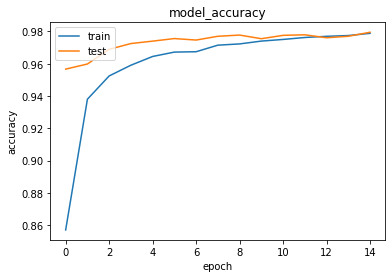

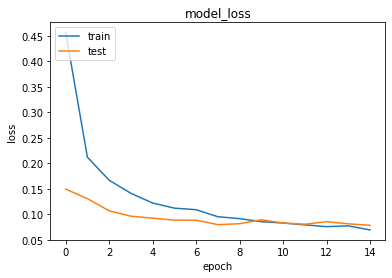

In [31]:
#plotting the accuracy and loss variations
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
#model evaluation
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9808
Test Accuracy: 0.9807999730110168


**Model Summary**
> - I have used MNIST hand written digits dataset for Classification. The data is loaded and preprocessed to flatten the features and one-hot encode the labels.
> - The Sequential model is designed with 7 layers:
>> - Input layer
>> - 2 hidden layers
>> - 3 dropout layers with value 0.4 to reduce overfitting
>> - Output layer
> - After checking different parameters, below are finalized.
>> - Optimizer: Adam
>> - Loss: categorical_crossentropy
>> - Batch Size: 75
>> - Epochs: 15
> - With the model setup we have got a good fit with test accuracy of 98%.
> - The model working is specified at the code level as comments.